In [8]:
## Packags
import numpy as np
import pandas as pd
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import os 
import gc
import time
import datetime

import multiprocessing as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [9]:
action_data = pd.read_csv('./input/jd_data.csv')

### Data Extract, Load & Transform
In this dataset, the action_type is defined as follows:

1 = Browse

2 = Order

3 = Follow

4 = Comment

5 = Add to Cart

In [10]:
action_data.head()

,user_log_acct,item_sku_id,action_time,action_type,brand_code,shop_id,item_third_cate_cd,vender_id,shop_score,age,sex,user_level,province,city,county
0,937922,357022,2020-02-04 08:28:15,1,1791.0,8703.0,10.0,5227.0,-1.000000,5.0,1.0,5,11.0,348.0,1782.0
1,937922,73,2020-02-04 08:27:07,1,1791.0,8703.0,10.0,5227.0,-1.000000,5.0,1.0,5,11.0,348.0,1782.0
2,937922,29583,2020-02-04 08:26:31,1,1791.0,2738.0,10.0,3436.0,9.206167,5.0,1.0,5,11.0,348.0,1782.0
3,937922,108763,2020-02-04 08:26:10,1,1791.0,2738.0,10.0,3436.0,9.206167,5.0,1.0,5,11.0,348.0,1782.0
4,1369473,331139,2020-02-03 21:55:49,1,9985.0,6367.0,73.0,3666.0,0.000000,5.0,1.0,5,1.0,41.0,2058.0


In [11]:
action_data.describe(include='all')

,user_log_acct,item_sku_id,action_time,action_type,brand_code,shop_id,item_third_cate_cd,vender_id,shop_score,age,sex,user_level,province,city,county
count,3.721427e+07,3.721427e+07,37214269,3.721427e+07,3.685885e+07,3.685885e+07,3.685885e+07,3.685885e+07,3.685885e+07,3.719402e+07,3.719722e+07,3.721427e+07,3.719064e+07,3.719064e+07,3.719064e+07
unique,NaN,NaN,7587787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2020-02-21 12:20:42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.031901e+05,1.894298e+05,NaN,1.213940e+00,5.005406e+03,5.284548e+03,3.333888e+01,4.309021e+03,5.730775e+00,4.675889e+00,3.426404e-01,4.964685e+00,1.647483e+01,1.926757e+02,1.396651e+03
std,4.646623e+05,1.085244e+05,NaN,7.204231e-01,3.232466e+03,2.905019e+03,2.654280e+01,2.215891e+03,4.650212e+00,1.526698e+00,4.790582e-01,2.335126e+00,8.349575e+00,1.077599e+02,8.265293e+02
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.007620e+05,9.646500e+04,NaN,1.000000e+00,2.484000e+03,2.884000e+03,7.000000e+00,3.663000e+03,0.000000e+00,5.000000e+00,0.000000e+00,5.000000e+00,9.000000e+00,1.080000e+02,6.760000e+02
50%,8.017410e+05,1.879250e+05,NaN,1.000000e+00,4.356000e+03,5.523000e+03,2.600000e+01,3.666000e+03,9.312615e+00,5.000000e+00,0.000000e+00,6.000000e+00,1.900000e+01,1.910000e+02,1.430000e+03
75%,1.206948e+06,2.838930e+05,NaN,1.000000e+00,7.628000e+03,7.794000e+03,5.800000e+01,5.522000e+03,9.541875e+00,6.000000e+00,1.000000e+00,7.000000e+00,2.300000e+01,2.890000e+02,2.136000e+03


In [12]:
# Check Missing Values
action_data.isnull().sum()

user_log_acct              0
item_sku_id                0
action_time                0
action_type                0
brand_code            355423
shop_id               355423
item_third_cate_cd    355423
vender_id             355423
shop_score            355423
age                    20252
sex                    17050
user_level                 0
province               23626
city                   23626
county                 23626
dtype: int64

There are still a lot of missing values in the data, mainly product attributes (brand_code, shop_id, etc.) and user information (province, city).

In [13]:
# Check and clean "Date" Value
action_data['dd_len'] = action_data['action_time'].apply(lambda x: len(str(x)))
action_data[action_data['dd_len']==21]['action_time'].values[0]
action_data[action_data['dd_len']==19]['action_time'].values[0]

'2020-02-04 08:28:15'

In [14]:
# Abnormalities exsit
# action_data['dd_len'] = action_data['action_time'].apply(lambda x: len(str(x)))
action_data['action_time'] = action_data['action_time'].apply(lambda x: x[:19])
del action_data['dd_len']

# Transform date into the format of "datetime64"
action_data['timestamp'] = pd.to_datetime(action_data['action_time'])
# Extract Time
action_data['date'] = action_data['timestamp'].dt.date
action_data['time'] = action_data['timestamp'].dt.time
# Extract Hour
action_data['hour'] = action_data['timestamp'].dt.hour

In [15]:
action_data[action_data.action_type==5]['date'].min(), action_data[action_data.action_type==5]['date'].max()

(datetime.date(2020, 4, 8), datetime.date(2020, 4, 15))

Due to issues with data acquisition, the add-on behavior was only present from April 8 to April 15, so only this data was used for the path analysis

In [16]:
data = action_data[action_data['date']>=action_data[action_data.action_type==5]['date'].min()]

# Handling of sub-behavior
click_df = data[data['action_type']==1]
cart_df = data[data['action_type']==5]
order_df = data[data['action_type']==2]
follow_df = data[data['action_type']==3]

In [17]:
click_df.head()

,user_log_acct,item_sku_id,action_time,action_type,brand_code,shop_id,item_third_cate_cd,vender_id,shop_score,age,sex,user_level,province,city,county,timestamp,date,time,hour
17,1455298,208441,2020-04-11 15:21:43,1,2484.0,9583.0,8.0,4874.0,9.605158,5.0,1.0,1,8.0,182.0,1650.0,2020-04-11 15:21:43,2020-04-11,15:21:43,15
18,1455298,334318,2020-04-11 15:14:54,1,2484.0,3230.0,8.0,3184.0,9.427261,5.0,1.0,1,8.0,182.0,1650.0,2020-04-11 15:14:54,2020-04-11,15:14:54,15
19,1455298,237755,2020-04-11 15:14:13,1,2484.0,4178.0,8.0,3666.0,0.000000,5.0,1.0,1,8.0,182.0,1650.0,2020-04-11 15:14:13,2020-04-11,15:14:13,15
20,1455298,6422,2020-04-11 15:22:25,1,2484.0,4019.0,8.0,8398.0,9.393827,5.0,1.0,1,8.0,182.0,1650.0,2020-04-11 15:22:25,2020-04-11,15:22:25,15
21,1455298,268566,2020-04-11 15:14:26,1,2484.0,4178.0,8.0,3666.0,0.000000,5.0,1.0,1,8.0,182.0,1650.0,2020-04-11 15:14:26,2020-04-11,15:14:26,15


In [18]:
# Repeated Behavior Filtering
print(click_df.shape)
click_df = click_df.drop_duplicates(['user_log_acct','item_sku_id','item_third_cate_cd','date'], keep='first')
print(click_df.shape)
cart_df = cart_df.drop_duplicates(['user_log_acct','item_sku_id','item_third_cate_cd','date'], keep='first')
order_df = order_df.drop_duplicates(['user_log_acct','item_sku_id','item_third_cate_cd','date'], keep='first')
follow_df = follow_df.drop_duplicates(['user_log_acct','item_sku_id','item_third_cate_cd','date'], keep='first')

(3106625, 19)
(2848556, 19)


In [19]:
# Merging Dataframe
cart_df['action_cart'] = 1
order_df['action_order'] = 1
follow_df['action_follow'] = 1

cart_df['cart_time'] = cart_df['action_time']
order_df['order_time'] = order_df['action_time']
follow_df['follow_time'] = follow_df['action_time']

click_df = click_df.merge(cart_df[['user_log_acct','item_sku_id','date','cart_time','action_cart']], on=['user_log_acct','item_sku_id','date'], how='left')
click_df = click_df.merge(order_df[['user_log_acct','item_sku_id','date','order_time','action_order']], on=['user_log_acct','item_sku_id','date'], how='left')
click_df = click_df.merge(follow_df[['user_log_acct','item_sku_id','date','follow_time','action_follow']], on=['user_log_acct','item_sku_id','date'], how='left')

click_df = click_df.fillna(0)

In [20]:
click_df.head()

,user_log_acct,item_sku_id,action_time,action_type,brand_code,shop_id,item_third_cate_cd,vender_id,shop_score,age,...,timestamp,date,time,hour,cart_time,action_cart,order_time,action_order,follow_time,action_follow
0,1455298,208441,2020-04-11 15:21:43,1,2484.0,9583.0,8.0,4874.0,9.605158,5.0,...,2020-04-11 15:21:43,2020-04-11,15:21:43,15,0,0.0,0,0.0,0,0.0
1,1455298,334318,2020-04-11 15:14:54,1,2484.0,3230.0,8.0,3184.0,9.427261,5.0,...,2020-04-11 15:14:54,2020-04-11,15:14:54,15,2020-04-11 15:21:38,1.0,2020-04-11 15:26:42,1.0,0,0.0
2,1455298,237755,2020-04-11 15:14:13,1,2484.0,4178.0,8.0,3666.0,0.000000,5.0,...,2020-04-11 15:14:13,2020-04-11,15:14:13,15,0,0.0,0,0.0,0,0.0
3,1455298,6422,2020-04-11 15:22:25,1,2484.0,4019.0,8.0,8398.0,9.393827,5.0,...,2020-04-11 15:22:25,2020-04-11,15:22:25,15,0,0.0,0,0.0,0,0.0
4,1455298,268566,2020-04-11 15:14:26,1,2484.0,4178.0,8.0,3666.0,0.000000,5.0,...,2020-04-11 15:14:26,2020-04-11,15:14:26,15,0,0.0,0,0.0,0,0.0


Analyze the dataset based on the questions posed previously

### Traffic and conversion metrics

#### Pageviews PV and Unique Visitors UV



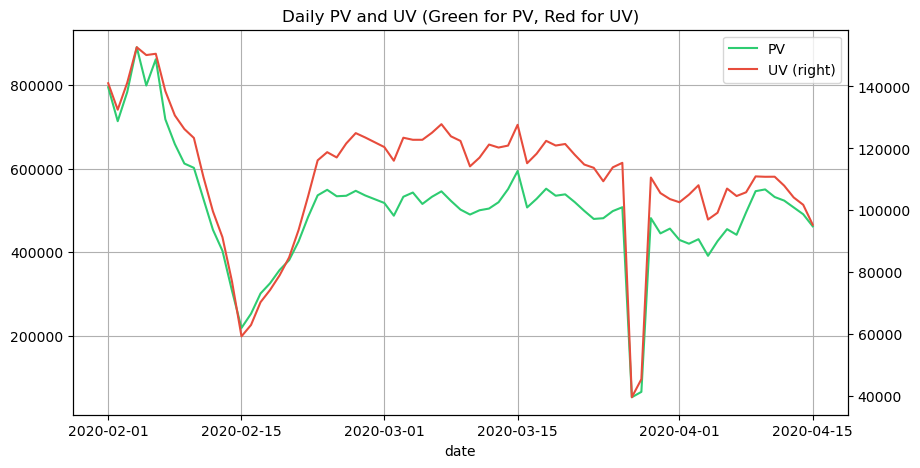

In [21]:
# Define functions that can be grouped by the received key values, returning pv and uv
def cal_pvuv(key = ''): 
    pv = action_data.groupby(key)['user_log_acct'].count()
    pv.name = 'pv'
    uv = action_data.groupby(key)['user_log_acct'].apply(lambda x: x.drop_duplicates().count())
    uv.name = 'uv'
    return pd.concat([pv,uv], axis = 1).reset_index()
pvuv_daily = cal_pvuv('date') # Get pv and uv data aggregated by date
ax = pvuv_daily.plot(
    x='date',
    y='pv',
    color='#2ECC71',      
    grid=True,
    figsize=(10, 5),
    label='PV'
)

pvuv_daily.plot(
    x='date',
    y='uv',
    ax=ax,
    color='#E74C3C',      
    secondary_y=True,
    label='UV'
)
plt.title('Daily PV and UV (Green for PV, Red for UV)')
plt.show()

From the figure can be seen pv and uv overall change trend is the same, February 15 is pv and uv stage peak, March 27, 28 two days there are obvious anomalies, the probability is due to the data sampling caused by the problem

Next go by the hour to analyze the user's behavioral habits:

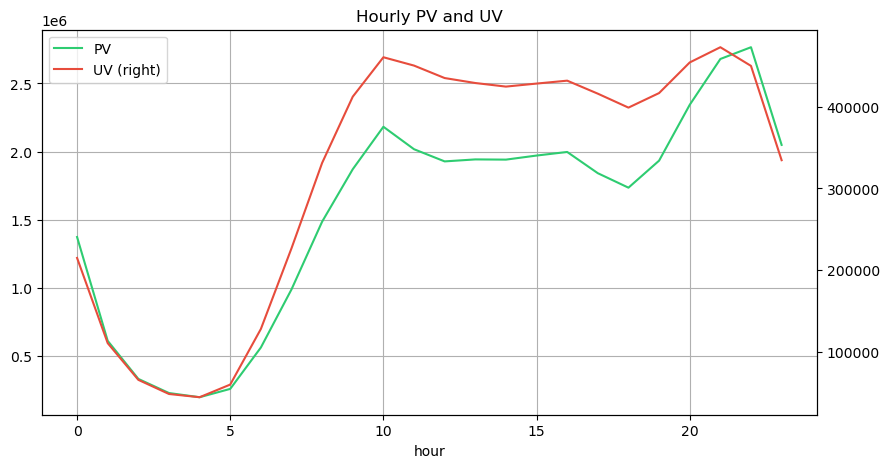

In [22]:
pvuv_hour = cal_pvuv('hour')
ax = pvuv_hour.plot(
    x='hour',
    y='pv',
    color='#2ECC71',      
    grid=True,
    figsize=(10, 5),
    label='PV'
)

pvuv_hour.plot(
    x='hour',
    y='uv',
    ax=ax,
    color='#E74C3C',      
    secondary_y=True,
    label='UV'
)
plt.title('Hourly PV and UV')
plt.show()

From the above chart can be seen from the user's active time from 10 am to 10 pm, especially from 6 pm to show a clear upward trend, to peak at about 9 pm, which is in line with most people's daily routine. It can be suggested that the store adjust the customer service hours, increase the number of customer service from 6 pm to 10 pm, prompting users to convert from browsing to buying.

#### Average Page Depth nad Bounce Rate

In [23]:
# Calculate total number of users
uv_count = len(action_data.user_log_acct.unique())
# Calculate the total number of page views
pv_count = action_data[action_data.action_type == 1].shape[0]
# Calculate the average visit depth
print('Average Depth of Visits： %.1f' % (pv_count / uv_count))
# Calculate the number of pages viewed per user
pv_count_perUser = action_data[action_data['action_type'] == 1].groupby('user_log_acct')['action_type']\
                     .count().reset_index().rename(columns = {'action_type':'pv_count'})
# Count the number of users who have viewed the interface only once
bounce_user_count = pv_count_perUser[pv_count_perUser['pv_count'] == 1].shape[0]
print('Bounce Rate： %.3f%% ' % (100 * (bounce_user_count / uv_count)))

Average Depth of Visits： 20.6
Bounce Rate： 5.537% 


In [24]:
60 / 20.6

2.9126213592233006

The average user visit depth is 20.6, which means that between February and April, each user visited around 3 pages per day on average. This suggests that JD.com's user stickiness is moderate.

If we calculate the churn rate as the number of users who only viewed one page divided by the total number of users, we find that only 89,081 users churned, resulting in a bounce rate of approximately 5.537%. Therefore, the platform's overall churn rate is quite low.

I suggest considering users who only have browsing records but no other actions as churned users, and analyzing the reasons behind their bounce behavior.

We can further break this down by product category and individual products, calculate their respective user bounce rates, and take corresponding measures.

#### User Conversion Analysis
Next, we will analyze the user conversion funnel from browsing to final purchase. To begin with, we examine the overall distribution trends of key user actions, including browsing, following, adding to cart, and placing an order.

In this dataset, the action_type is defined as follows:

1 = Browse

2 = Order

3 = Follow

4 = Comment

5 = Add to Cart

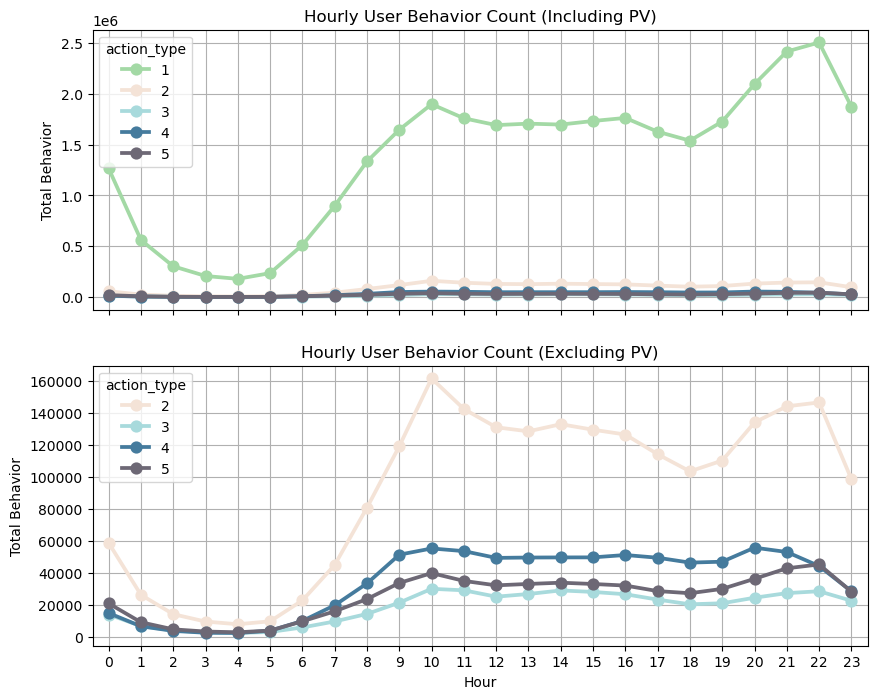

In [25]:
# Data Preparation
pv_detail = action_data.groupby(['action_type','hour'])['user_log_acct'].count().reset_index().rename(columns={'user_log_acct':'total_behavior'})
# Colour
action_colors = {
    1: '#A3D9A5',  # Browse
    2: '#F4E3D7',  # Order
    3: '#A8DADC',  # Follow
    4: '#457B9D',  # Comment
    5: '#6D6875',  # Add to cart
}

palette = [action_colors[i] for i in sorted(pv_detail['action_type'].unique())]

fig, axes = plt.subplots(2, 1, figsize = (10,8), sharex = True)
sns.pointplot(x = 'hour',y = 'total_behavior', hue = 'action_type', data = pv_detail, ax = axes[0], palette=palette)
axes[0].set_title('Hourly User Behavior Count (Including PV)')
axes[0].set_ylabel('Total Behavior')
axes[0].grid()

sns.pointplot(x = 'hour',y = 'total_behavior', hue = 'action_type', data = pv_detail[pv_detail.action_type!=1], ax = axes[1], palette=palette[1:])
axes[1].set_title('Hourly User Behavior Count (Excluding PV)')
axes[1].set_ylabel('Total Behavior')
axes[1].set_xlabel('Hour')
axes[1].grid()

plt.show()

The first chart shows the hourly distribution of all user behaviors, including page views (PV). As expected, PVs dominate in volume, with clear peaks in the evening hours (especially around 9 PM to 11 PM). This masks the trends of lower-frequency behaviors like cart additions, orders, follows, and payments.

To better visualize those behaviors, the second chart excludes PVs. It reveals that these actions follow similar temporal patterns, with activity typically rising in the late morning and peaking in the evening, aligned with PV spikes. This consistency suggests that user engagement and conversion-related behaviors (carting, ordering) are highly correlated with browsing intensity.

Overall, the temporal patterns across behavior types are synchronized, but the magnitude varies drastically — with PVs being several orders higher than other interactions.

#### Conversion Rate Calculation

In [26]:
click_df['action_order'].mean()

0.0650083761737526

In [27]:
click_df['action_cart'].mean()

0.15384461460473306

In [28]:
click_df['action_follow'].mean()

0.014985136328722342

In [29]:
click_df[click_df['action_order']==1][click_df['action_cart']==1].shape[0] / \
click_df[click_df['action_order']==1].shape[0]

0.7437034236958635

Among all product clicks, 6.5% resulted in an order, while 15.4% led to a cart addition. This indicates that more users show purchase intention than those who actually convert.

Only 1.5% of clicks lead to a follow action, suggesting it's used sparingly for longer-term consideration.

Notably, 74.4% of orders were preceded by cart additions, highlighting the cart as a key conversion step in the user journey.

#### PUR（Paying User Rate）

Calculated based on User Payment Rate = Users with Purchase History / Active Users

In [30]:
# Paying User Rate
paying_user_count = click_df[click_df.action_order == 1].user_log_acct.unique().shape[0]
uv_count = click_df['user_log_acct'].unique().shape[0]

print('Paying User Rate %.2f%%' % ( 100 * paying_user_count / uv_count))

Paying User Rate 39.01%


The user payment rate reached 39.01%, and the Jingdong user payment rate is still relatively high.

### User behavior path analysis

In [31]:
df = click_df.groupby(['hour']).agg({'action_order':'mean','action_cart':'mean','action_follow':'mean'}).reset_index()

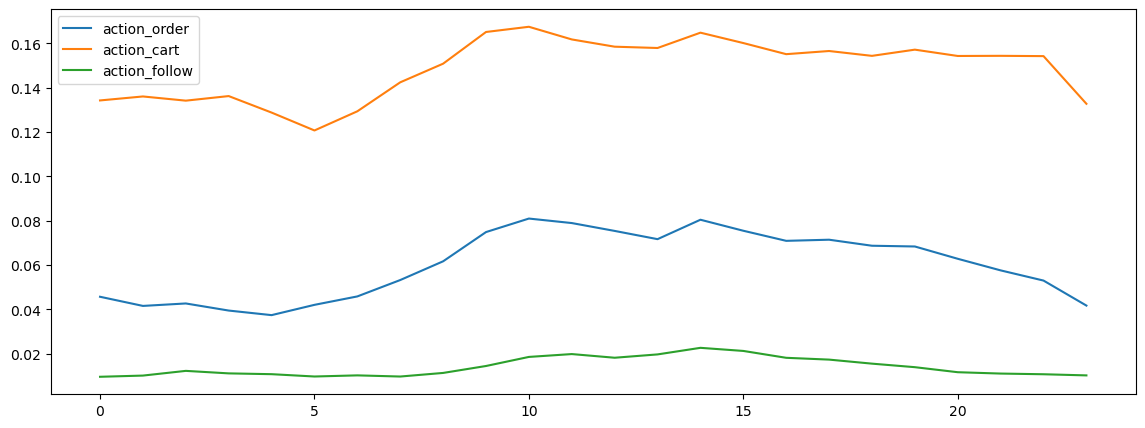

In [32]:
df.loc[:,['action_order','action_cart','action_follow']].plot(figsize=(14,5)) 
plt.show()

The chart above shows the hourly variation in conversion rates for Click-to-Order, Click-to-Add-to-Cart, and Click-to-Follow. Among these, the trends of "Click-to-Order" and "Click-to-Add-to-Cart" are generally consistent.

In [33]:
cart2order = click_df[click_df.action_cart==1].groupby(['hour']).agg({'action_order':'mean'}).reset_index()
cart2order.columns = ['hour','cart2order']
follow2order = click_df[click_df.action_follow==1].groupby(['hour']).agg({'action_order':'mean'}).reset_index()
follow2order.columns = ['hour','follow2order']

In [34]:
cart2order = cart2order.merge(follow2order, on='hour', how='left')

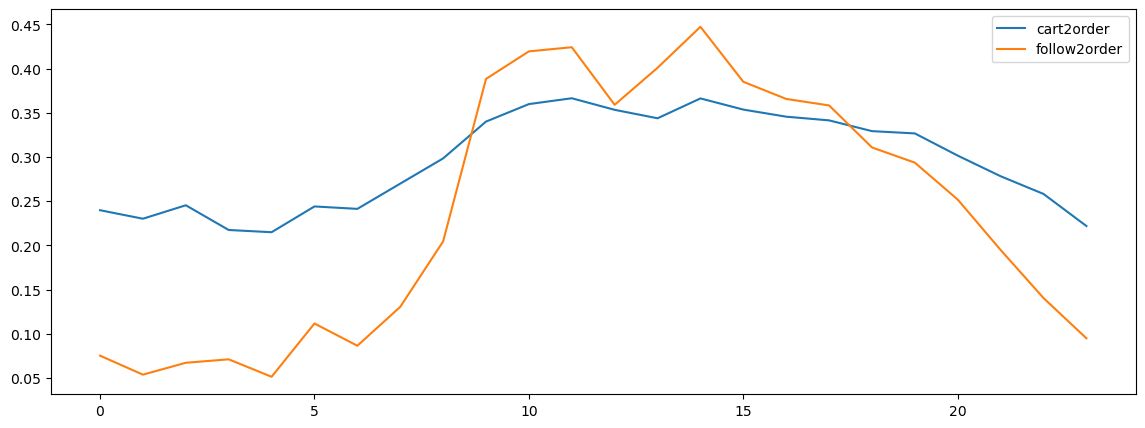

In [35]:
cart2order.loc[:,['cart2order','follow2order']].plot(figsize=(14,5)) 
plt.show()

This chart compares hourly conversion rates from cart and follow behaviors to actual orders.

Cart-to-order conversion remains relatively stable throughout the day, suggesting cart actions represent strong purchase intent regardless of time.

In contrast, follow-to-order conversion shows pronounced fluctuation — peaking during midday hours (10 AM to 2 PM) with rates over 45%, and dropping significantly in early morning and evening.

These trends imply that users who follow products during working hours are more likely to convert, while cart behavior is less time-sensitive and more consistently predictive of orders.

##### Breakdown
Select two categories (34 and 69) to compare and analyze the conversion rates of “view/click-add” and “add-purchase”.

In [36]:
click_df['item_third_cate_cd'].value_counts()

item_third_cate_cd
7.0     668197
34.0    145540
27.0    137016
81.0    134851
69.0    133378
         ...  
40.0      1304
1.0        800
18.0       398
5.0        344
50.0       319
Name: count, Length: 80, dtype: int64

In [37]:
click_df[click_df.item_third_cate_cd.isin([34,69])].groupby(['item_third_cate_cd']).agg({'action_order':'mean','action_cart':'mean','action_follow':'mean'}).reset_index()

,item_third_cate_cd,action_order,action_cart,action_follow
0,34.0,0.065254,0.141075,0.012430
1,69.0,0.066728,0.129459,0.013151


In [38]:
click_df[(click_df.item_third_cate_cd.isin([34,69]))&(click_df.action_cart==1)].groupby(['item_third_cate_cd']).agg({'action_order':'mean'}).reset_index()

,item_third_cate_cd,action_order
0,34.0,0.334600
1,69.0,0.381479


During the browsing process, the percentage of users who were interested in purchasing in category 69 and added to the shopping cart was slightly lower than in category 34, but in the conversion of add to purchase, 69 performed better than 34, resulting in a slightly higher final purchase conversion rate than 34.

### Breaking down user behavior using the AARRR funnel model

1、Acquisition

Since the first login time of each user is not given in the data, we tentatively treat April 8, 2020 as the first login time of each user.

During the study period, there were new users every day, but the new users were decreasing, and there was only a small rebound on the weekend of the launch of the marketing campaigns, so the launch of the marketing campaigns can attract new users, and the promotion channels of the marketing campaigns may be the key to how much the number of users grows.


In [39]:
df = click_df[click_df.action_order==1].groupby(['date'])['user_log_acct'].unique().reset_index()

In [40]:
df.head()

,date,user_log_acct
0,2020-04-08,"[1465052, 469668, 377317, 1276144, 1096416, 93..."
1,2020-04-09,"[1177411, 727932, 327912, 841035, 555131, 6546..."
2,2020-04-10,"[209165, 1528227, 541689, 1297142, 282140, 118..."
3,2020-04-11,"[1455298, 1103962, 958904, 1265494, 1099402, 1..."
4,2020-04-12,"[1223015, 437691, 97130, 1058516, 1052926, 897..."


In [41]:
# # Select April 8, 2020 as the first day of the app's launch and define new users as those who made their first purchase
dic = {}
hist_users = []
for items in tqdm(df.values):
    nums = 0
    for i in items[1]:
        if i not in hist_users:
            nums += 1
            hist_users.append(i)
    dic[items[0]] = nums

100%|██████████| 8/8 [02:29<00:00, 18.71s/it]


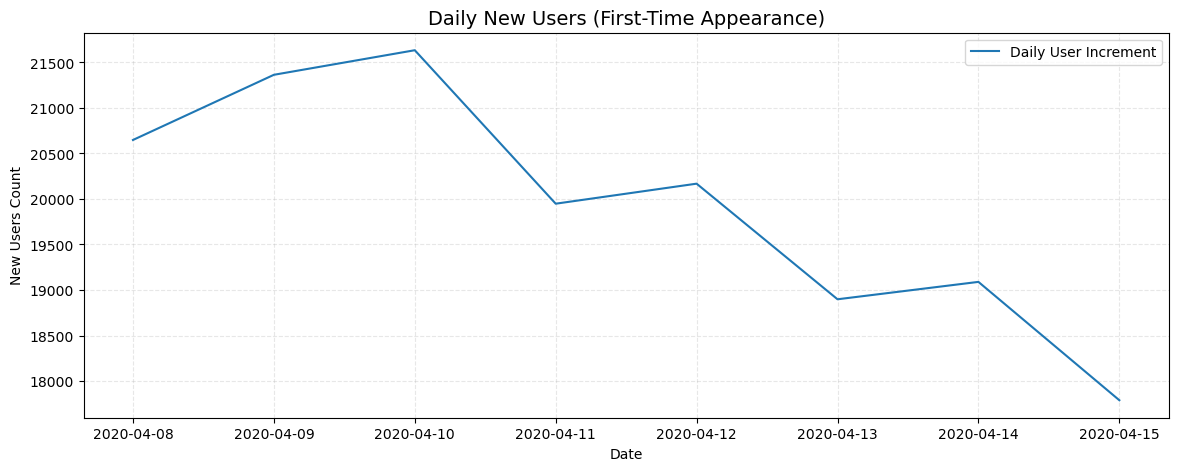

In [42]:
pd.DataFrame({'Daily User Increment':dic}).plot(figsize=(14,5))
plt.title('Daily New Users (First-Time Appearance)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('New Users Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This chart shows the number of new users appearing for the first time on each day.



2、Acitvation

Following and adding to cart in a shopping session are both behaviors that determine the intention to shop, and are not sequential, so they are combined into one step in the shopping session.

In [43]:
click_df[(click_df.action_follow==1)|(click_df.action_cart==1)].shape[0] / click_df.shape[0]

0.1620772068374292

Only 16% of users convert from browsing (clicking) to showing purchase intent. While some users do proceed directly to purchase, this still indicates that the majority primarily engage in browsing, with relatively low conversion to purchase. This stage represents a key bottleneck in the conversion funnel that requires improvement.

Recommendations to enhance conversion at this stage include:

Optimize search relevance and recommendation algorithms: Proactively recommend products based on user preferences, improve the accuracy and aggregation of search results, and refine the prioritization of product listings.

Enable product comparison features: Help users compare similar items side by side, reducing the need to return to the search results repeatedly and allowing for quicker decision-making.

Highlight key information on product detail pages: Focus on displaying the most relevant content users care about, and simplify the layout to reduce the effort required to find information.

Improve accessibility of Add-to-Cart and Follow buttons: Ensure these functions are easy to access even while scrolling, to encourage more frequent usage and interaction.

3、Retention

The retention analysis also treats April 8, 2020 as the first login time for each user

In [44]:
df = click_df[click_df.action_order==1].groupby(['date'])['user_log_acct'].unique().reset_index()

In [45]:
dic = {}
hist_users = list(set(df.values[0][1]))
for items in tqdm(df.values[1:]):
    nums = 0
    for i in items[1]:
        if i in hist_users:
            nums += 1
    dic[items[0]] = nums / len(hist_users) * 100

100%|██████████| 7/7 [00:35<00:00,  5.07s/it]


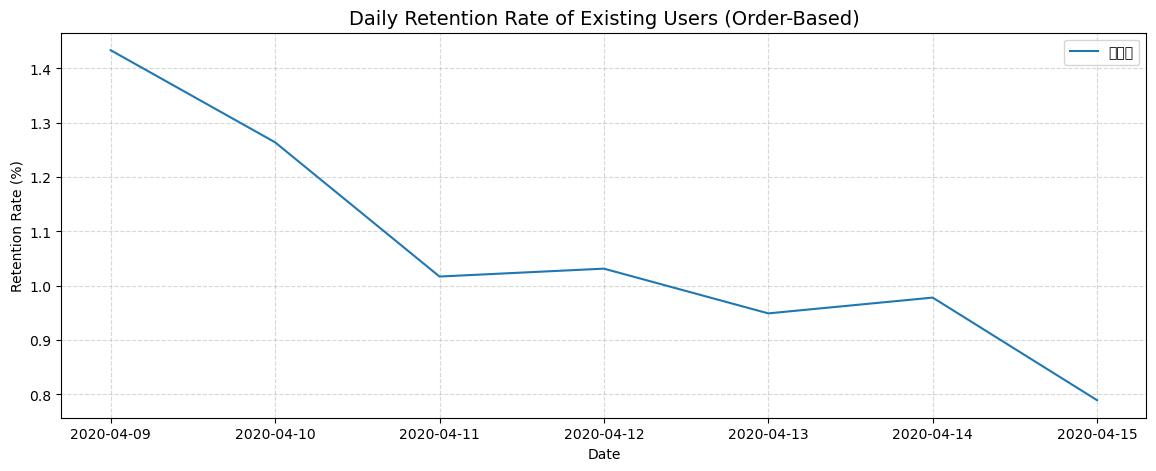

In [46]:
pd.DataFrame({'留存率':dic}).plot(figsize=(14,5))
plt.title('Daily Retention Rate of Existing Users (Order-Based)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Retention Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Jingdong platform retention is relatively low, here may be the reason for sampling, can be combined with product design and new user conversion path to analyze the reasons for the loss of users, through continuous modification and adjustment to reduce user turnover, improve the next day retention rate;

4、Revenue

In [47]:
click_df[click_df['action_order']==1]['user_log_acct'].nunique() / click_df['user_log_acct'].nunique()

0.39013141484934

39% of users using the Jingdong platform are paid users, a fairly high paid conversion rate.

The focus of business should be transformed into cultivating user loyalty, encouraging users to consume more frequently.

High repurchase number of users is small, merchants can look for reasons from the quality of goods, service quality, logistics experience three aspects, locate where the problem point, seek high repurchase rate sudden.

5、Reference

Jingdong itself has a large user base, high visibility, I think the users in the first and second-tier cities have basically reached saturation, the spread of work needs to be directed at the third and fourth-tier cities channel sinking, in these areas for the user price sensitivity of the characteristics of high to carry out similar Jindoduo's group forwarding and discount promotions, to expand the utilization rate of this part of the user.

### Analysis of user consumption habits and ways to deal with them

#### User Consumption Habits Analysis
- Consumption frequency dimension

In [48]:
consumption = action_data[action_data.action_type==2]['user_log_acct'].value_counts()
consumption.head(10)

user_log_acct
1187177    237
1275396    220
659687     211
318840     141
1400097    138
653834     123
895484     122
711516     101
1334223    101
346637     100
Name: count, dtype: int64

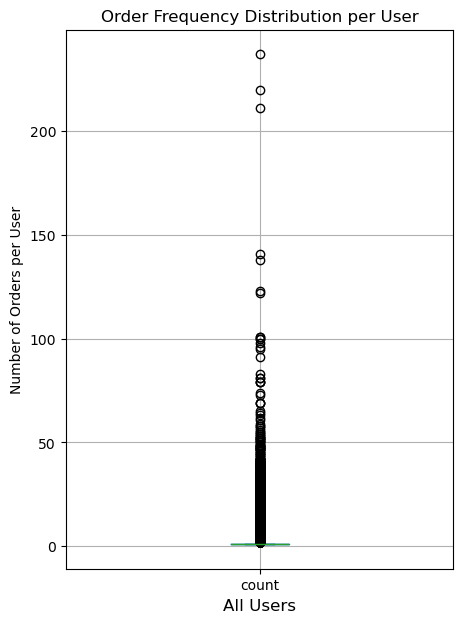

In [49]:

plt.figure(figsize=(5,7))
consumption.plot.box(grid=True)
plt.title("Order Frequency Distribution per User")
plt.ylabel("Number of Orders per User")
plt.xlabel("All Users", fontsize=12) 
plt.show()

Most users are light buyers
The majority of users place very few orders — this is evident from the lower quartile and median being close to the bottom of the boxplot.

Highly skewed distribution
There is a long tail of users with extremely high order frequencies (outliers far above the upper whisker), indicating a small group of super buyers or loyal customers who contribute disproportionately to total orders.

Presence of outliers
The presence of many outlier dots suggests diverse user behavior. Some users may place over 100 or even 200 orders in the observed period, which could be either high-value customers or abnormal usage (e.g., bots or merchants).

User segmentation opportunity
The data supports a segmentation strategy:

Target most users with re-engagement campaigns (since they rarely purchase).

Create loyalty or VIP programs for heavy buyers.

Retention/Revenue Implication
Losing a small number of high-frequency users could significantly impact sales.
On the flip side, even a modest conversion of low-frequency users could boost total revenue.

In [50]:
consumption.mean()

1.3635105709119186

The majority of users are in the 1 time the number of consumption, there are individual users consumption behavior more often.

#### Profitability of the platform（ARPPU）
- ARPPU = Total Revenue / Number of Spending Users
- Total revenue is replaced by the number of consumptions

In [51]:
ARPPU_day = action_data[action_data.action_type==2].groupby(['date','user_log_acct'])['action_type'].count().reset_index()
ARPPU_day.columns = ['date','user_log_acct','number of consumptions']
ARPPU_day.head()

,date,user_log_acct,number of consumptions
0,2020-02-01,28,1
1,2020-02-01,76,1
2,2020-02-01,80,1
3,2020-02-01,130,4
4,2020-02-01,156,1


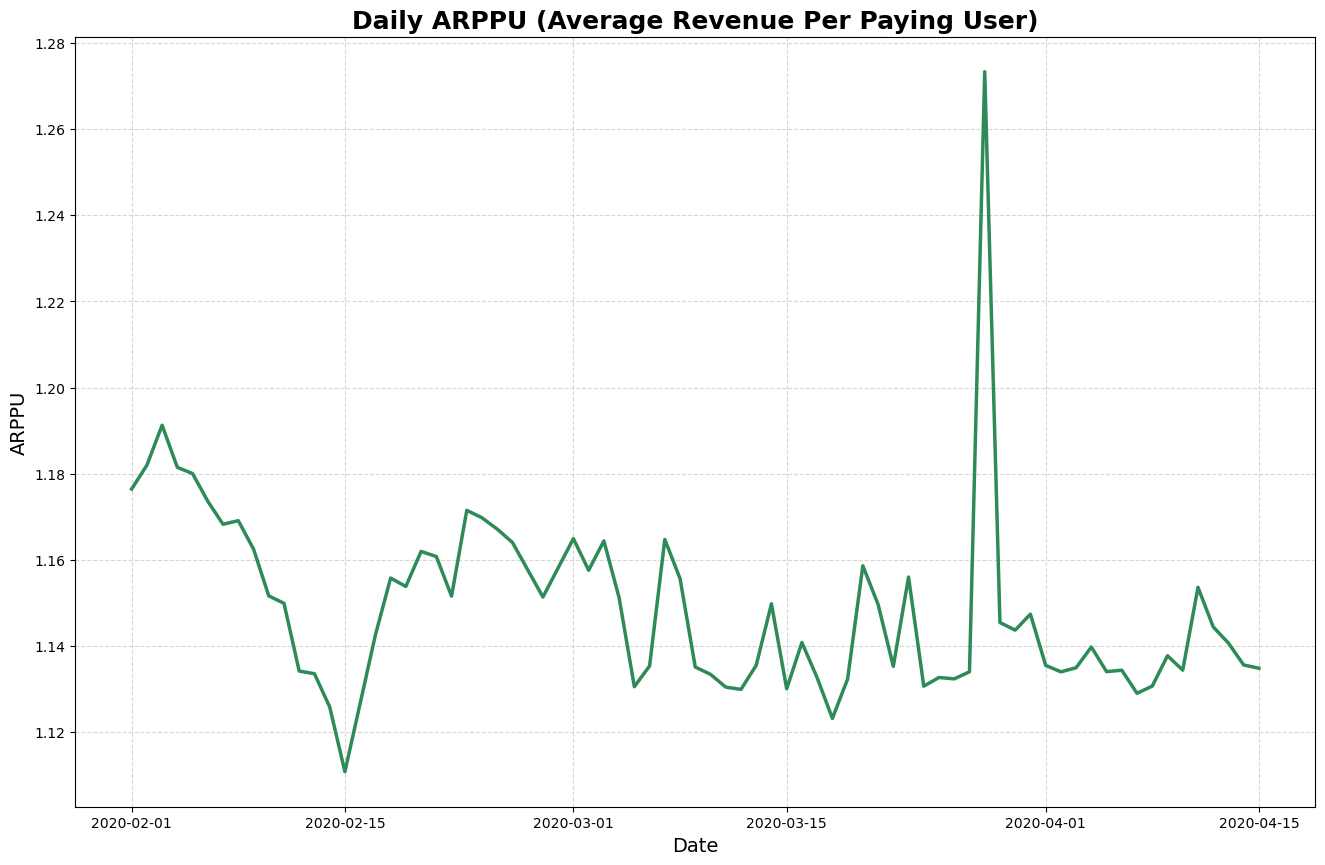

In [52]:
ARPPU_day = ARPPU_day.groupby('date').sum()['number of consumptions']/ARPPU_day.groupby(['date']).count()['number of consumptions']
plt.figure(figsize=(16,10))
sns.lineplot(data=ARPPU_day, color="#2E8B57", linewidth=2.5)
plt.title("Daily ARPPU (Average Revenue Per Paying User)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("ARPPU", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Overall Stability with Minor Fluctuations: ARPPU remains relatively stable between 1.1 and 1.2 across most dates, indicating consistent spending behavior among paying users.
Notable Spike at the End of March:
A sharp increase around the end of March suggests an anomaly, possibly due to: A sudden drop in the number of paying users (smaller denominator), or a few high-value transactions skewing the average upward.

This warrants further investigation—check for promotions, system glitches, or unusual user activity.

Slight Decline Mid-February to Early March:
There is a gradual decline in ARPPU during this period, potentially caused by:
A shift in user behavior post-holiday,
An increase in lower-spending users, or
Reduced conversion effectiveness.

#### Repurchase rate
Repurchase Rate = Repeat Users / Total Users with Consumption Behavior

In [53]:
RE_PAY = action_data[action_data.action_type==2].groupby('user_log_acct')['date'].apply(lambda x:len(x.unique()))
print(round(RE_PAY[RE_PAY>=2].count()/RE_PAY.count(),2))

0.13


Only 13% of users who made a purchase returned to make another one on a different day.
This indicates a low customer loyalty or retention rate. It may imply:

Lack of incentives for repeat purchase

Weak brand or product stickiness

Users may be one-time opportunistic buyers

#### Average user rating

In [54]:
action_data.groupby(['user_log_acct'])['user_level'].mean().reset_index()['user_level'].value_counts()

user_level
1.0    488955
6.0    445733
5.0    349352
7.0    308464
3.0      9603
4.0      6588
2.0        12
Name: count, dtype: int64

The user level distribution is U-shaped, with a large number of users concentrated at both the lowest (Level 1) and highest tiers (Level 6–7), while intermediate levels (2–5) have significantly fewer users.

#### Product Related Analysis
- Merchandise Sales Analysis
- Commodity Behavior Analysis

In [55]:
item_cat_bh_counts = pd.pivot_table(action_data \
                               .groupby(['item_third_cate_cd','action_type'])['user_log_acct'] \
                               .count().reset_index(name='count'),
                               values='count',
                               index='item_third_cate_cd',
                               columns='action_type')
item_cat_bh_counts.fillna(0,inplace=True)

In [56]:
item_cat_bh_counts

action_type,1,2,3,4,5
item_third_cate_cd,,,,,
1.0,8883.0,511.0,63.0,1681.0,105.0
2.0,78325.0,17582.0,2170.0,4514.0,2001.0
3.0,280108.0,24800.0,3623.0,6579.0,8794.0
4.0,14256.0,2491.0,436.0,886.0,614.0
5.0,3068.0,342.0,105.0,76.0,81.0
...,...,...,...,...,...
77.0,323975.0,27354.0,6187.0,10282.0,4855.0
78.0,76477.0,2778.0,1157.0,1835.0,911.0
79.0,165641.0,13460.0,2130.0,3706.0,4808.0


In [57]:
buycounts_cat = item_cat_bh_counts[2].sort_values(ascending=False)
buycounts_cat_df= buycounts_cat.reset_index(name='Purchases')
buycounts_cat_df['cumsum_purchases'] = buycounts_cat_df['Purchases'].cumsum(axis=0)
buycounts_cat_df['cumsum_purchases_pct'] = buycounts_cat_df.cumsum_purchases/buycounts_cat_df.Purchases.sum()

In [58]:
cat_counts_pct = np.around(np.linspace(0,len(buycounts_cat.index),num=10)/len(buycounts_cat.index),2)

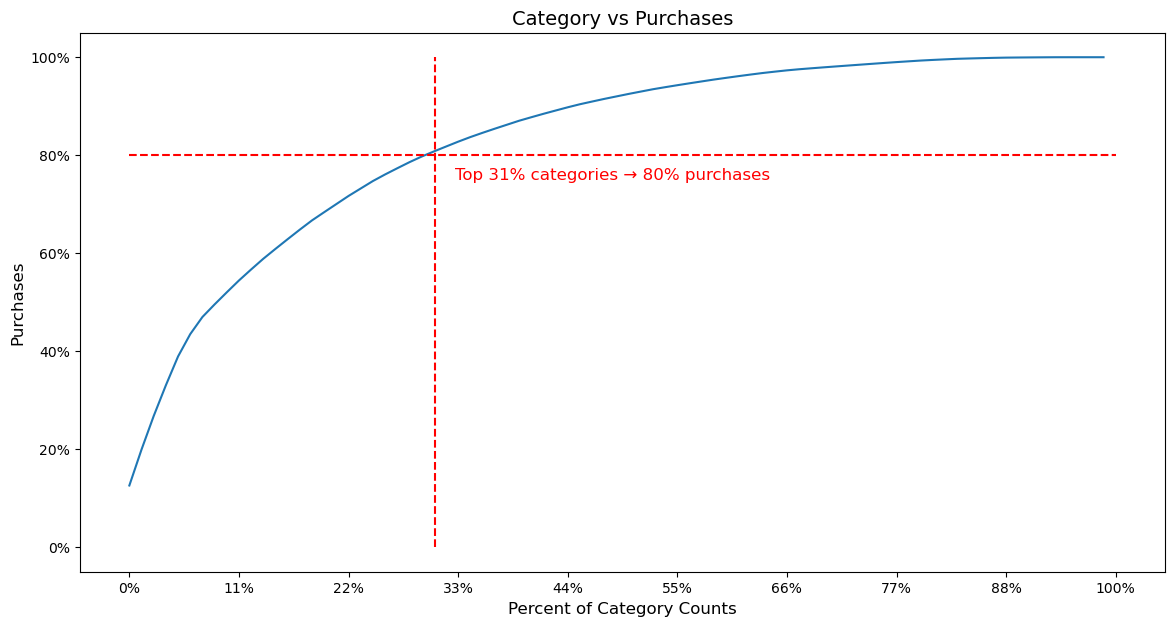

In [59]:
# Step 1: Calculate the first number of categories to reach 80% of cumulative purchases
threshold_idx = buycounts_cat_df[buycounts_cat_df['cumsum_purchases_pct'] >= 0.8].index[0]
category_pct = round(threshold_idx / len(buycounts_cat_df), 2)

# Step 2: Explicitly add a “category share” column as a horizontal axis
buycounts_cat_df['category_pct'] = buycounts_cat_df.index / len(buycounts_cat_df)

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot('category_pct', 'cumsum_purchases_pct', data=buycounts_cat_df)
ax.set_xticks(np.linspace(0, 1.0, num=10))
ax.set_xticklabels([f'{int(x*100)}%' for x in np.linspace(0, 1.0, num=10)])
ax.set_yticks(np.linspace(0, 1.0, num=6))
ax.set_yticklabels([f'{int(y * 100)}%' for y in np.linspace(0, 1.0, num=6)])
ax.set_xlabel('Percent of Category Counts', size=12)
ax.set_ylabel('Purchases', size=12)
ax.set_title('Category vs Purchases', size=14)
ax.hlines(0.8, 0, 1.0, color='r', ls='--')
ax.vlines(category_pct, 0, 1.0, color='r', ls='--')
ax.text(category_pct + 0.02, 0.75,
        f'Top {int(category_pct * 100)}% categories → 80% purchases',
        color='red', fontsize=12)

plt.show()

The chart reveals a clear head-category dominance in user purchasing behavior on the platform. Specifically:

The top 31% of product categories account for approximately 80% of total purchases, indicating that the majority of conversions are driven by a relatively small subset of popular categories.

In contrast, the remaining ~70% of categories (the "long tail") contribute only 20% of purchases, suggesting lower conversion efficiency despite potential visibility.

This reflects a classic Pareto pattern (80/20 rule), which carries several strategic implications:

The platform should prioritize investment in top-performing categories, such as promoting them in featured sections, improving their search ranking, and ensuring stock availability to maximize conversion.

It may be valuable to evaluate and streamline underperforming long-tail categories, reducing redundancy and focusing on those with niche potential or strategic relevance.

If diversification of user purchasing behavior is a goal, recommendation strategies, cross-category bundling, or themed promotions can be leveraged to boost mid- and long-tail engagement.



In [60]:
# Which types of goods are purchased more
top10_buycounts_cat = buycounts_cat_df[['item_third_cate_cd','Purchases']].head(10)

In [61]:
from plotly import graph_objects as go
# Visualization of purchases in the Top 10 product categories
top10_sorted = top10_buycounts_cat.sort_values(by='Purchases', ascending=False)
labels = [
    f"Category ID: {int(row['item_third_cate_cd'])}, Purchase Count: {int(row['Purchases']):,}"
    for _, row in top10_sorted.iterrows()
]
values = top10_sorted['Purchases'].values
colors = [
    '#FFD000', '#FF6670', '#678F8D', '#77A88D', '#91BDA4',
    '#A3C6B4', '#BED7C6', '#D4E4D9', '#E6F0EB', '#F2F7F4'
]

fig = go.Figure(data=[go.Pie(labels=labels,values=values)],
               layout=go.Layout(title = 'Top 10 Purchases in different category'.title()))
fig.update_traces(hoverinfo='label', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors,line=dict(color='white', width=1)))

fig.show()

### Mining usable information from product correlation
- (1) Explicit correlation: category correlation, attribute correlation, etc;
- (2) Implicit correlation: Apriori association mining, commodity vector similarity.

In [62]:
from gensim.models import Word2Vec
# Aggregate to get list of users, items
df_group = click_df.groupby(['user_log_acct'])['item_sku_id'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
df_group.head()

,user_log_acct,item_sku_id
0,2,341714 30171 71752 185628 98543 253315 3747 80...
1,4,114769 205762 7082 229924 233176 217000 58838
2,12,327130 37284
3,14,157860 147679 194609 47850
4,19,89666 112625 330502


In [63]:
def get_w2v(sentences, f1, f2, values, emb_size): 
    
    model = Word2Vec(sentences, vector_size=emb_size, sg=1, window=5, seed=2020, workers=4, min_count=1, epochs=10)
    
    w2v=[]
    for v in values:
        try:
            a = [int(v)]
            a.extend(model.wv[str(v)])
            w2v.append(a)
        except:
            a = [int(v)]
            a.extend([0] * emb_size)
            w2v.append(a)
    
    out_df = []
    for li in w2v:
        out_df.append([li[0],li[1:]])
        
    out_df = pd.DataFrame(out_df)
    out_df.columns = [f2] + ['vector']
    
    return out_df

    
def item2vec(df_, f1, f2, emb_size):
    
    df = df_.copy()
    df = df.sort_values('action_time', ascending=True)
   
    sentences = df.groupby([f1])[f2].agg({list}).reset_index()['list'].values.tolist()
    for i in range(len(sentences)):
        sentences[i] = [str(x) for x in sentences[i]]
    
    values = df[f2].unique()
    out_df = get_w2v(sentences, f1, f2, values, emb_size)
    
    return out_df

In [64]:
emb_df = item2vec(click_df, 'user_log_acct', 'item_sku_id', 16)

In [65]:
emb_df

,item_sku_id,vector
0,140127,"[-0.47437754, 0.106186464, 0.1816011, -0.49459..."
1,190562,"[-0.65456414, 0.8329624, -0.2658048, -0.777093..."
2,119221,"[0.56978077, 1.1644036, -0.23206344, -1.750171..."
3,139872,"[-0.45102575, 0.9253492, 0.0006576157, 0.19440..."
4,244471,"[0.04031368, 1.0244215, -0.9681893, -0.0467985..."
...,...,...
186072,75006,"[-0.14423636, 0.06048384, 0.031501308, -0.0724..."
186073,283168,"[-0.014574462, 0.36265835, -0.0315249, 0.06744..."
186074,99292,"[0.05240781, -0.04330851, -0.027281448, 0.0416..."
186075,55286,"[-0.16822468, 0.25447348, 0.006610166, -0.0790..."


In [66]:
# cosine similarity
from scipy.spatial import distance

item_embedding = emb_df.loc[emb_df["item_sku_id"]==119221, "vector"].iloc[0]
emb_df["sim_value"] = emb_df["vector"].map(lambda x : 1 - distance.cosine(item_embedding, x))

In [67]:
# Sort by similarity in descending order, query first 10 items
emb_df.sort_values(by="sim_value", ascending=False)[:50000]

,item_sku_id,vector,sim_value
2,119221,"[0.56978077, 1.1644036, -0.23206344, -1.750171...",1.000000
37410,196956,"[0.21430327, 0.8170942, -0.2075658, -1.1732997...",0.990905
40225,126828,"[0.34572288, 0.7952544, -0.28350475, -1.114162...",0.985348
97533,77673,"[0.1849927, 0.62913996, -0.36260378, -1.212292...",0.985035
47448,269207,"[0.36460143, 0.64330167, -0.14632648, -1.35475...",0.982902
...,...,...,...
135675,63977,"[0.10226628, 0.3968964, -0.009788945, -0.04182...",0.586623
41501,217913,"[-0.26299998, 0.24176379, -0.033959385, -0.284...",0.586622
166270,227387,"[-0.1012659, 0.30222616, -0.034116186, -0.2244...",0.586622
87216,97518,"[0.10260402, 1.4743694, 0.37601703, -2.3399734...",0.586621


### User value analysis using RFM models and ways to respond to it

However, due to the lack of amounts in this dataset, we can only categorize the value of the user in terms of R (recent time of consumption) and F (frequency of consumption over this period of time).

- R (Recency): based on the user's most recent purchase time to April 16, 2020 time difference to determine the user's most recent consumption time interval
- F (Frequency): the number of times the user consumed in the dataset from April 08, 2020 to April 15, 2020 to be used as frequency

|                 | R-values | F-values |
| --------------- | -------- | -------- |
| Important Users | High     | High     |
| Keep Users      | High     | Low      |
| Retain Users    | Low      | High     |
| Developing Users| Low      | Low      |

#### Define scoring criteria for R and F values

Since there are only 8 days of data, the R-value scoring criteria are defined as follows:

| Score | R (time difference)|
| ----| ---- |
| 5 | 1 day |
| 4 | 2-3 days |
| 3 | 4-5 days |
| 2 | 6-7 days |
| 1 | >7 days |

|Score |  F Value(Purchase Frequency)|
| ----| ---- |
| 5  | >10  |
| 4  | 6-10 |
| 3  | 3-5  |
| 2  | 2    |
| 1  | 1    |

In [68]:
today = pd.to_datetime("2020-04-16")
Recency = (
    click_df[click_df.action_order == 1]
    .groupby('user_log_acct')['date']
    .max()
    .reset_index()
)
Recency['R Value'] = (today - pd.to_datetime(Recency['date'])).dt.days
Recency.rename(columns={'user_log_acct': 'User Name'}, inplace=True)
Recency = Recency[['User Name', 'R Value']]
Recency.head()

,User Name,R Value
0,2,2
1,12,3
2,14,8
3,26,6
4,37,4


In [69]:
Frequery = click_df[click_df.action_order==1].groupby(['user_log_acct'])['date'].count().reset_index()
Frequery.columns = ['User Name','F Value']
Frequery.head()

,User Name,F Value
0,2,1
1,12,1
2,14,1
3,26,1
4,37,1


In [70]:
RFM = pd.merge(Recency, Frequery, on='User Name')
RFM.head()

,User Name,R Value,F Value
0,2,2,1
1,12,3,1
2,14,8,1
3,26,6,1
4,37,4,1


Before establishing the F-value scoring criteria, one needs to look at the distribution of purchases

In [71]:
print(RFM['F Value'].quantile(0.8))
print(RFM['F Value'].quantile(0.9))
print(RFM['F Value'].quantile(0.95))
print(RFM['F Value'].quantile(0.99))

1.0
2.0
2.0
4.0


In [72]:
def R(recent):
    if recent <= 1:
        return 5
    elif recent <= 3:
        return 4
    elif recent <= 5:
        return 3
    elif recent <= 7:
        return 2
    else:
        return 1

def F(freq):
    if freq > 10:
        return 5
    elif freq >= 6:
        return 4
    elif freq >= 3:
        return 3
    elif freq == 2:
        return 2
    else:
        return 1

RFM['R Score'] = RFM['R Value'].apply(R)
RFM['F Score'] = RFM['F Value'].apply(F)
RFM['RFM'] = RFM['R Score'] + RFM['F Score'] 


In [73]:
RFM['R Score'].mean() / RFM['F Score'].mean()

2.620379345287924

In [74]:
RFM['F Score'].mean()

1.1381363687648083

In [75]:
RFM.describe()

,User Name,R Value,F Value,R Score,F Score,RFM
count,1.595380e+05,159538.000000,159538.000000,159538.000000,159538.000000,159538.000000
mean,8.041728e+05,4.529090,1.160727,2.982349,1.138136,4.120485
std,4.647668e+05,2.273051,0.649586,1.212107,0.430651,1.312435
min,2.000000e+00,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.006512e+05,3.000000,1.000000,2.000000,1.000000,3.000000
50%,8.052455e+05,5.000000,1.000000,3.000000,1.000000,4.000000
75%,1.207603e+06,7.000000,1.000000,4.000000,1.000000,5.000000
max,1.608697e+06,8.000000,90.000000,5.000000,5.000000,10.000000


In [76]:
def get_segment_by_RF(r, f):
    if r >= 4 and f >= 4:
        return "Important User"
    elif r >= 4 and f < 4:
        return "Keep User"
    elif r < 4 and f >= 4:
        return "Retain User"
    else:
        return "Developing User"


In [77]:
RFM['Segment Label'] = RFM.apply(lambda row: get_segment_by_RF(row['R Score'], row['F Score']), axis=1)

In [78]:
RFM

,User Name,R Value,F Value,R Score,F Score,RFM,Segment Label
0,2,2,1,4,1,5,Keep User
1,12,3,1,4,1,5,Keep User
2,14,8,1,1,1,2,Developing User
3,26,6,1,2,1,3,Developing User
4,37,4,1,3,1,4,Developing User
...,...,...,...,...,...,...,...
159533,1608689,7,1,2,1,3,Developing User
159534,1608690,6,1,2,1,3,Developing User
159535,1608694,6,1,2,1,3,Developing User
159536,1608695,6,1,2,1,3,Developing User


In [79]:
RFM['Segment Label'].value_counts()

Segment Label
Developing User    100874
Keep User           58279
Important User        213
Retain User           172
Name: count, dtype: int64

In [92]:
from plotly import graph_objects as go


# 统计用户分组数量
segment_counts = RFM['Segment Label'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# 生成标签
labels = [
    f"{row['Segment']}: {int(row['Count']):,} users"
    for _, row in segment_counts.iterrows()
]
values = segment_counts['Count'].values

# 配色与爆炸拉出（按顺序）
colors = ['#CBD6D5', '#88BDBC', '#254E70', '#FFE156']
pulls = [0.05 if v < 1000 else 0 for v in values]  # < 1000 的拉出

# 绘图
fig = go.Figure(
    data=[go.Pie(
        labels=labels,
        values=values,
        pull=pulls,
        textinfo='percent',
        textfont_size=16,
        marker=dict(colors=colors, line=dict(color='white', width=1))
    )],
    layout=go.Layout(
        title='User Segmentation by RFM',
        margin=dict(l=80, r=80, t=80, b=80),
        legend=dict(orientation="v", x=1, y=0.5)
    )
)

fig.show()




Developing Users:100,874	These users have low recency and low frequency — they are low-engagement users, possibly new or disengaged. They make up the majority, indicating a need for activation strategies.

Keep Users:58,279	Recently active but low-frequency users. These users have potential if re-engaged. Personalized nudges or reminders could help convert them into loyal users.

Important Users: 213	Highly engaged both in recency and frequency. These are your VIPs and should be prioritized for loyalty rewards and personalized service.

Retain Users:172	These users buy frequently but haven’t visited recently. They are at risk of churn, and reactivation efforts should be prioritized.